# Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from gradientDescend import gradient_descent

# Armar un dataframe

In [2]:
df = pd.read_csv('weatherAUS.csv')
df_subset = df.iloc[:,1:]

# Vistazo rapido del dataframe

In [3]:
df_subset.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [4]:
df_subset.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [5]:
df_subset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

# Ver las columnas e identificar cada una

In [7]:
df_subset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

25 Columnas

**Unnamed** Indices (no esta en df_subset)

**Date** fecha de la observacion

**Location** Nombre del lugar donde esta la estacion meteorologica

**MinTemp** Temperatura minima. En grados celsius

**MaxTemp** Temperatura maxima. En grados celsius

**Rainfall** cantidad de lluvia registrada en el dia. En mm

**Evaporation** evaporacion (mm) de 00 a 09am.

**Sunshine** Numero de horas de luz solar durante el dia.

**WindGustDir** direccion de la rafaga de viento mas fuerte en las 24 horas

**WindGustSpeed** velocidad de la rafaga de viento mas fuerte en km/h

**WindDir9am** direccion del viento a las 9 am

**WindDir3pm** direccion del viento a las 3 pm

**WindSpeed9am** velocidad del viento en km/h, a las 9 am

**WindSpeed3pm** velocidad del viento en km/h, a las 3 pm

**Humidity9am** humedad en porcentaje a las 9 am

**Humidity3pm** humedad en porcentaje a las 3 pm

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 9 am

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 3 pm

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 9 am

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 3pm

**Temp9am** temperatura en grados celsius a las 9 am

**Temp3pm** temperatura en grados celsius a las 3 pm

**RainToday** valor booleano si llovio o no durante el dia (1 si pasa 1 mm)

**RainTomorrow** Cantidad de lluvia al dia siguiente en mm

**RainfallTomorrow** cantidad de lluvia al dia siguiente en mm

# Que no voy a usar
Date No se va a usar
Localization sera descartada ya que se tratan solamente de ciudades de Australia
tengo 145411 filas, si una columna tiene mas de 48000 valores faltantes la elimino (48000 es un tercio de los datos)
 Cloud9am y Cloud3pm tienen casi 60000 valores faltantes, Sunshine y Evaporation superan ampliamente los 48000.
 Por lo que estas columnas seran descartadas



 # Eliminar huecos en la data
tengo 145411 filas, si una columna tiene mas de 48000 valores faltantes la elimino (48000 es un tercio de los datos)
 Cloud9am y Cloud3pm tienen casi 60000 valores faltantes, Sunshine y Evaporation superan ampliamente los 48000.
 Por lo que estas columnas seran descartadas

In [8]:
df_subset = df_subset.drop(['Date', 'Location','Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainfallTomorrow'], axis=1)

# Que valores son numericos y cuales son categoricos

In [9]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [10]:
categorical_cols, numerical_cols= num_or_cat(df_subset)


# Contando valores faltantes

In [11]:
df_subset.isnull().sum()

MinTemp           1484
MaxTemp           1253
Rainfall          3260
WindGustDir      10316
WindGustSpeed    10253
WindDir9am       10562
WindDir3pm        4226
WindSpeed9am      1767
WindSpeed3pm      3061
Humidity9am       2653
Humidity3pm       4505
Pressure9am      15061
Pressure3pm      15024
Temp9am           1766
Temp3pm           3607
RainToday         3260
RainTomorrow      3259
dtype: int64

# llenar columnas numericas

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)

for columna in numerical_cols:
    df_subset[columna] = imputer.fit_transform(df_subset[[columna]])

In [13]:
#knnimputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform')
#
#for columna in numerical_cols:
#    df_subset[columna] = knnimputer.fit_transform(df_subset[[columna]])

In [14]:
df_subset.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10316
WindGustSpeed        0
WindDir9am       10562
WindDir3pm        4226
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3260
RainTomorrow      3259
dtype: int64

Capaz saque rainfall tomorrow del loop

# Cambiar Datos categoricos

En el caso de las columnas RainToday y RainTomorrow pasar Yes a 1 y no a 0

In [15]:
categorical_cols

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [16]:
df_subset['RainToday']=df_subset['RainToday'].fillna('No')
df_subset['RainTomorrow']=df_subset['RainTomorrow'].fillna('No')


In [17]:
df_subset['RainToday'] = df_subset['RainToday'].map({'No':0, 'Yes':1})
df_subset['RainTomorrow'] = df_subset['RainTomorrow'].map({'No':0, 'Yes':1})

# El resto de columnas categoricas reemplazar valores faltantes por la moda

In [18]:
df_subset['WindGustDir'] = df_subset['WindGustDir'].fillna(df_subset['WindGustDir'].mode()[0])
df_subset['WindDir9am'] = df_subset['WindDir9am'].fillna(df_subset['WindDir9am'].mode()[0])
df_subset['WindDir3pm'] = df_subset['WindDir3pm'].fillna(df_subset['WindDir3pm'].mode()[0])

# ----------------------------------------------------------------------------------------------------

In [19]:
lista = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
numerical_cols_copy = [elemento for elemento in numerical_cols if elemento not in lista]


# Graficar datos numericos

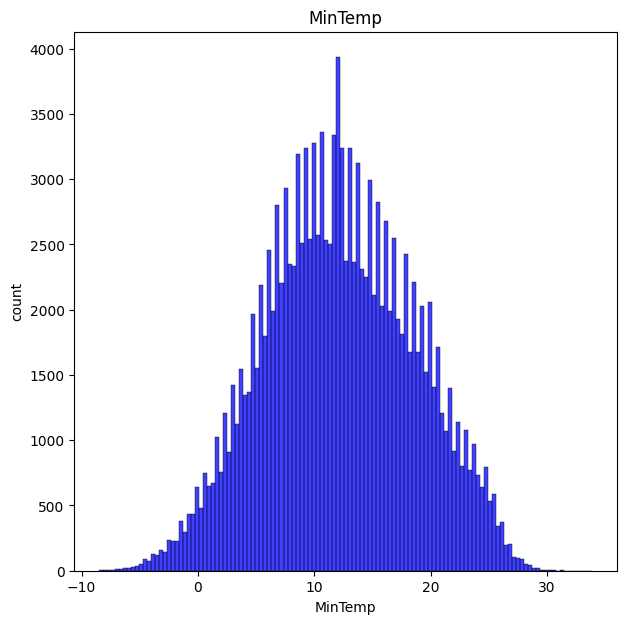

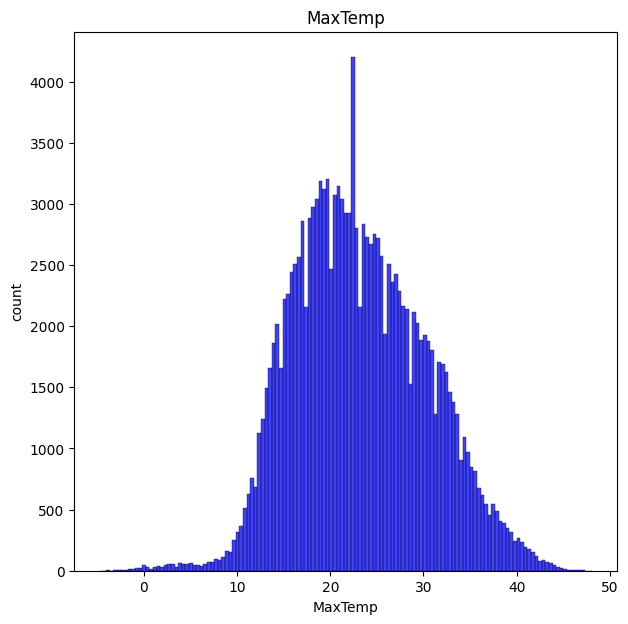

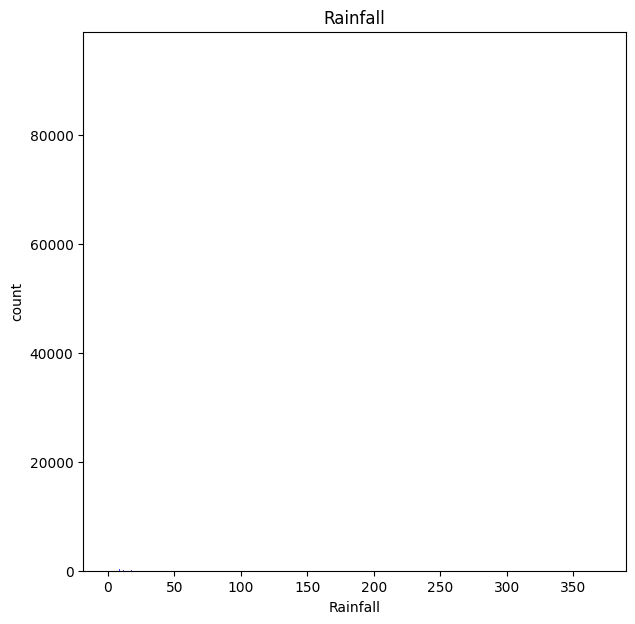

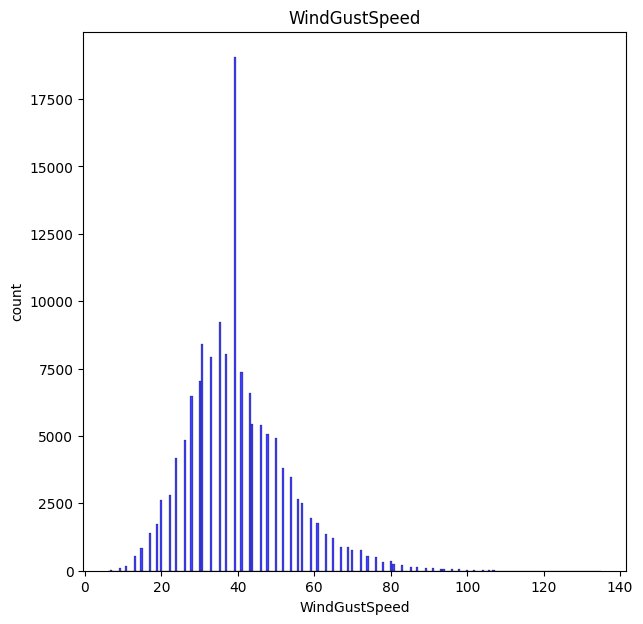

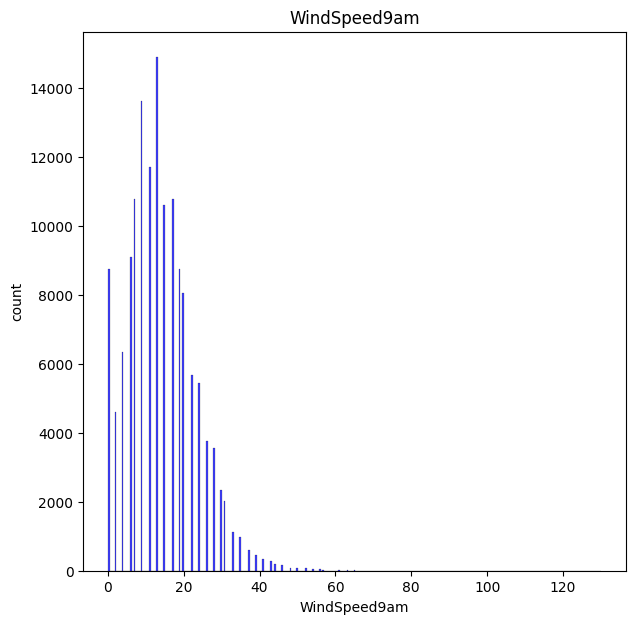

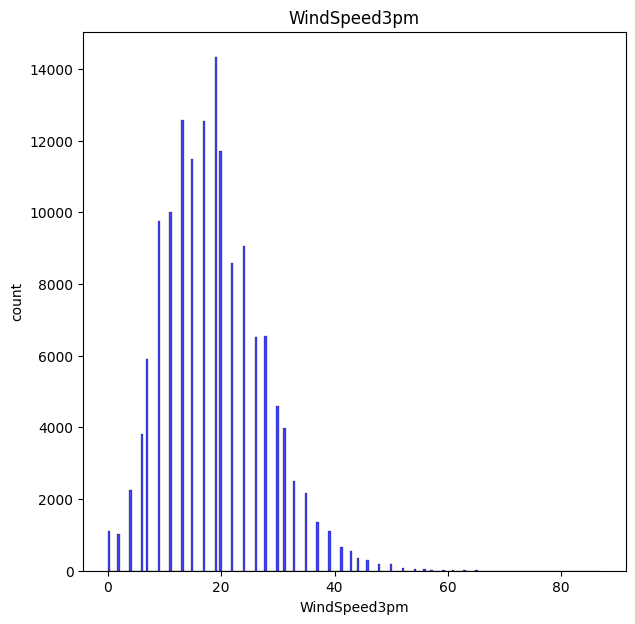

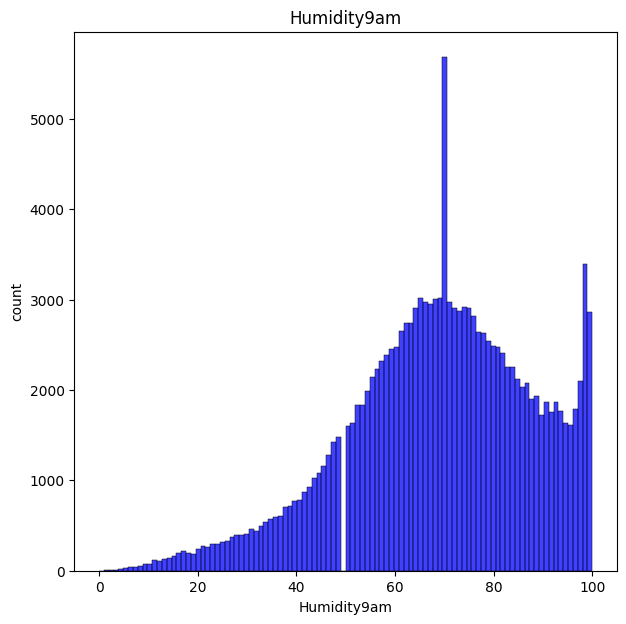

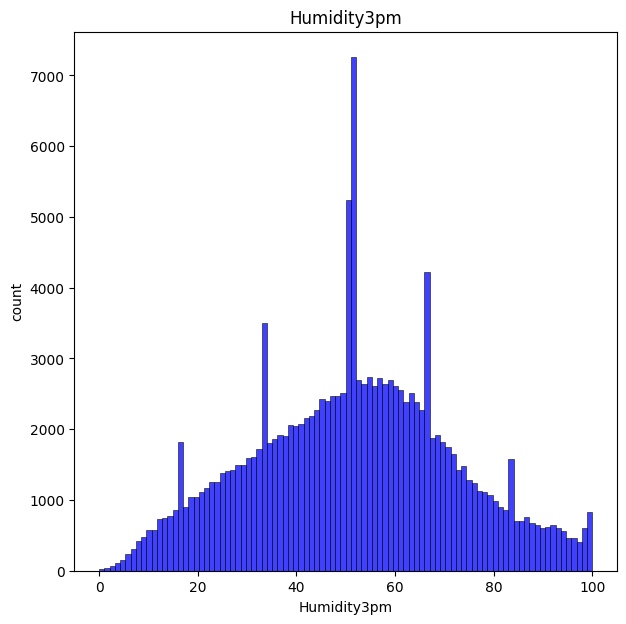

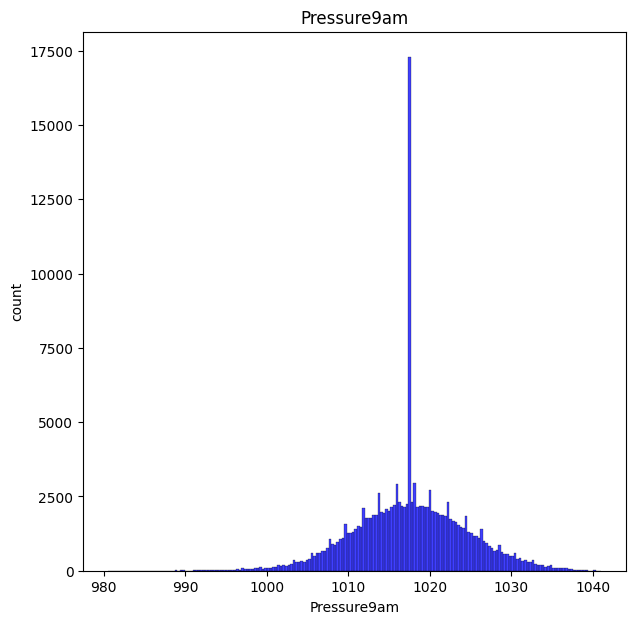

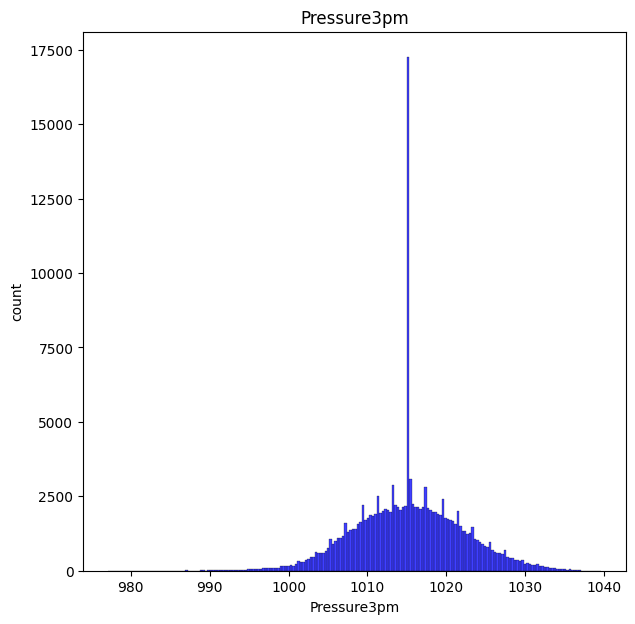

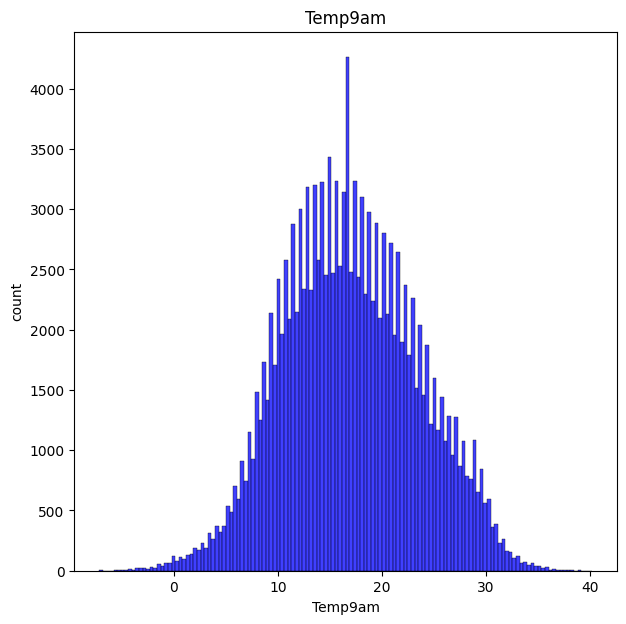

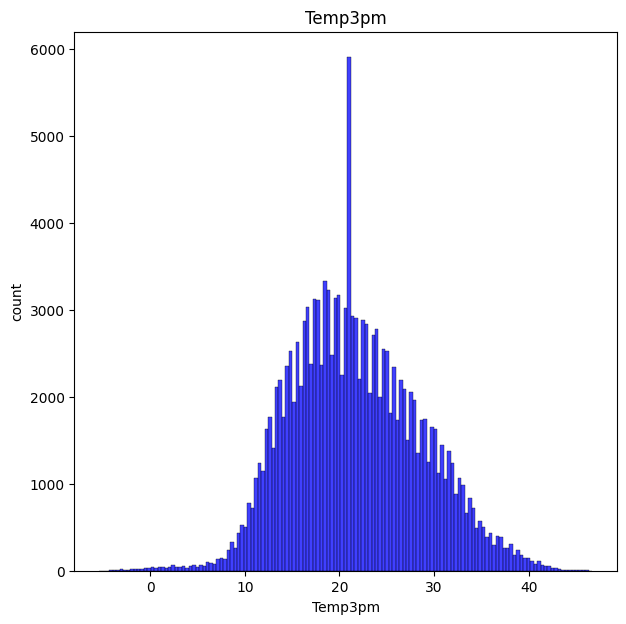

In [20]:
for i in range(len(numerical_cols_copy)):
    plt.figure(figsize=(7,7))
    sns.histplot(df_subset[numerical_cols_copy[i]], color="blue")
    label=numerical_cols_copy[i]
    plt.xlabel(numerical_cols_copy[i])
    plt.ylabel("count")
    plt.title(label)



In [21]:
df_subset.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Graficar Categoricos


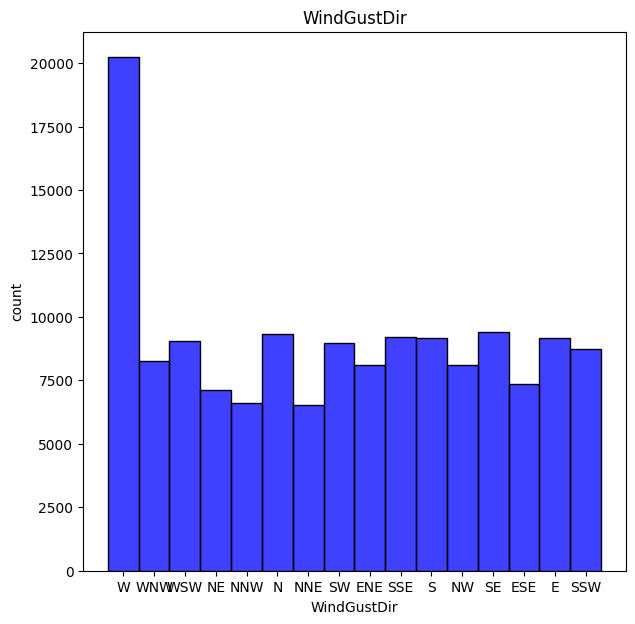

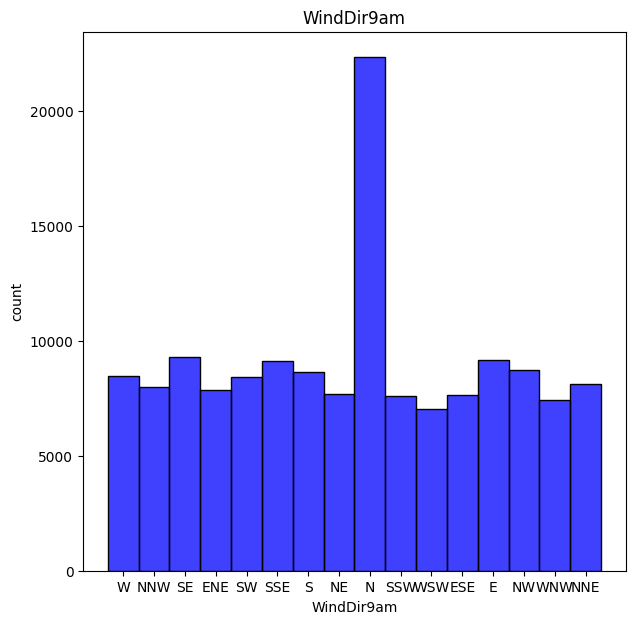

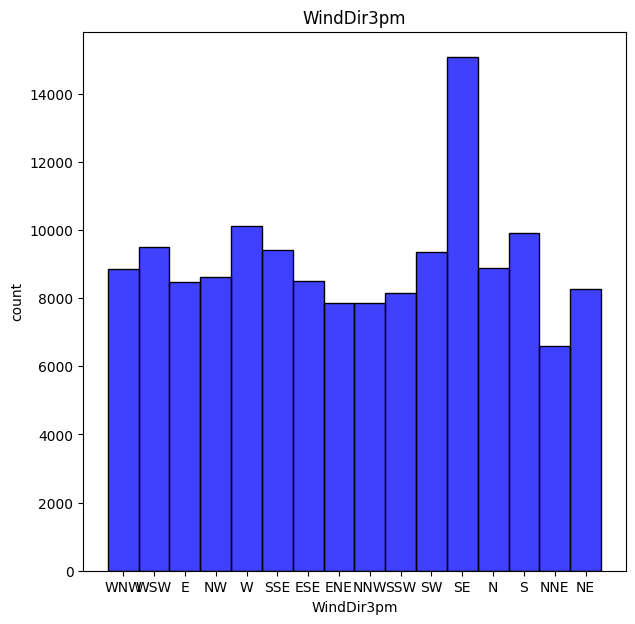

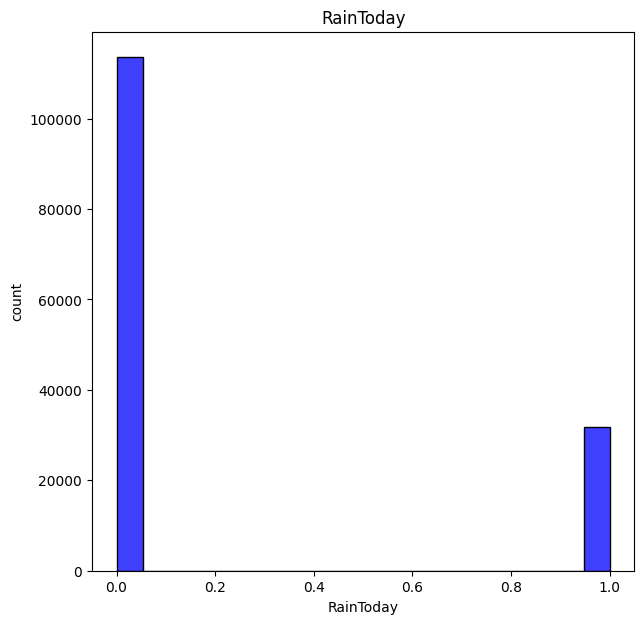

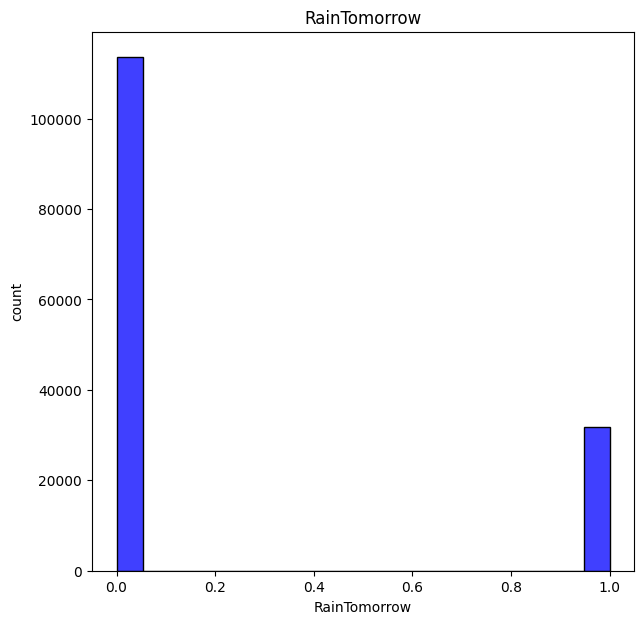

In [22]:
for i in range(len(categorical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(df_subset[categorical_cols[i]], color="blue")
    label=categorical_cols[i]
    plt.xlabel(categorical_cols[i])
    plt.ylabel("count")
    plt.title(label)

In [23]:
df_subset.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Check si esta balanceado

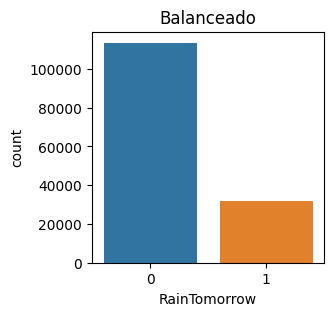

In [24]:
plt.figure(figsize=(3,3))
sns.countplot(x=df_subset['RainTomorrow'])
plt.title("Balanceado")
plt.show()

# Preparar dataset

In [25]:
copia_df = df_subset.copy()

# Codear los datos categoricos

In [26]:
le = LabelEncoder()
for columna in categorical_cols:
    copia_df[columna] = le.fit_transform(copia_df[columna])

# Hacer matriz de correlacion

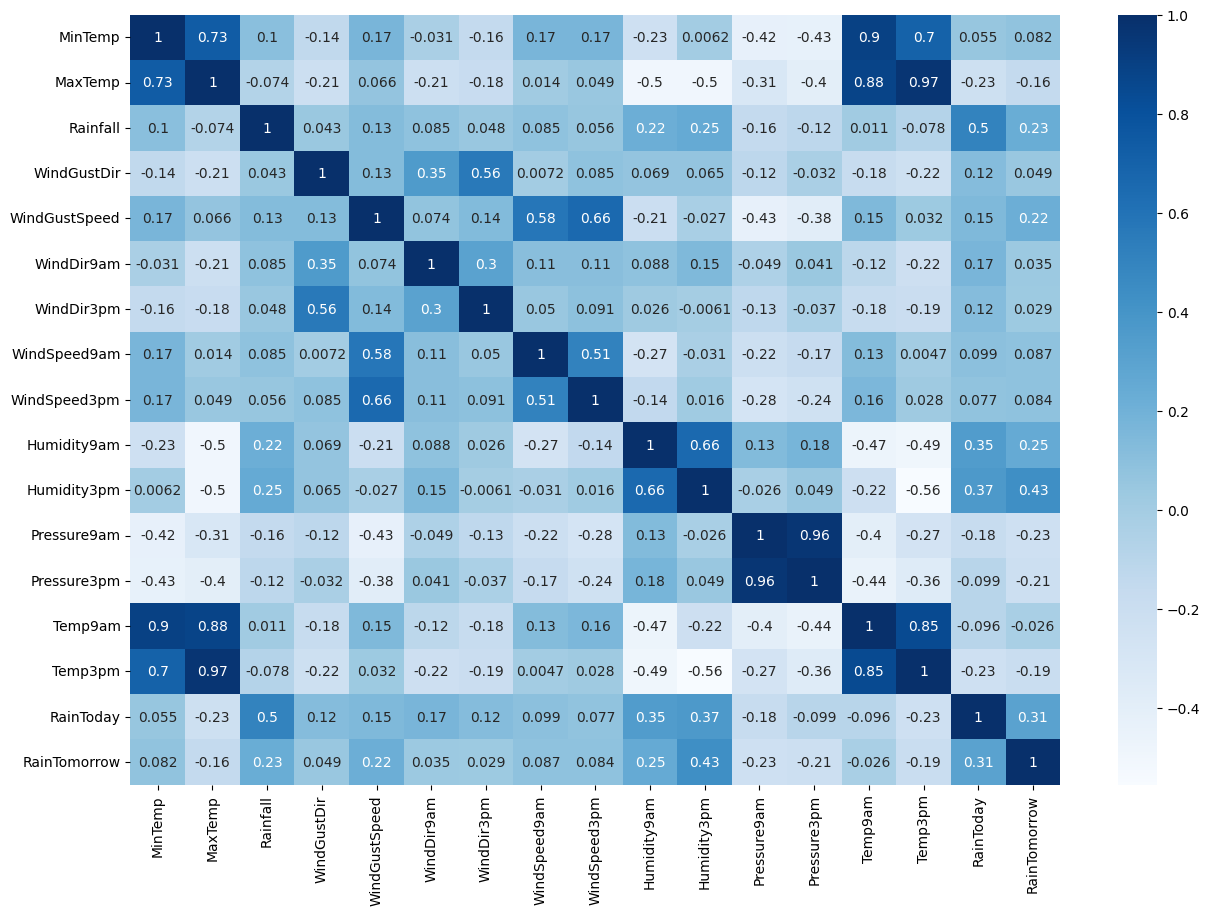

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(copia_df.corr(),annot=True, cmap="Blues")
plt.show()

In [28]:
copia_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


# Estandarizar los numericos

In [29]:
scaler= MinMaxScaler()
copia_df[numerical_cols_copy]=scaler.fit_transform(copia_df[numerical_cols_copy])

In [30]:
copia_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,13,0.294574,13,14,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0,0
1,0.375000,0.565217,0.000000,14,0.294574,6,15,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0,0
2,0.504717,0.576560,0.000000,15,0.310078,13,15,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0,0
3,0.417453,0.620038,0.000000,4,0.139535,9,0,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0,0
4,0.613208,0.701323,0.002695,13,0.271318,1,7,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0,0


# Dividir en train test

In [31]:
copia_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,13,0.294574,13,14,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0,0
1,0.375000,0.565217,0.000000,14,0.294574,6,15,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0,0
2,0.504717,0.576560,0.000000,15,0.310078,13,15,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0,0
3,0.417453,0.620038,0.000000,4,0.139535,9,0,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0,0
4,0.613208,0.701323,0.002695,13,0.271318,1,7,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0,0


In [32]:
X = copia_df.iloc[:,:-1].values

In [33]:
X

array([[0.51650943, 0.52362949, 0.00161725, ..., 0.50843882, 0.52207294,
        0.        ],
       [0.375     , 0.56521739, 0.        , ..., 0.51476793, 0.57005758,
        0.        ],
       [0.50471698, 0.57655955, 0.        , ..., 0.59493671, 0.54894434,
        0.        ],
       ...,
       [0.28537736, 0.56899811, 0.        , ..., 0.38185654, 0.57389635,
        0.        ],
       [0.32783019, 0.59924386, 0.        , ..., 0.41561181, 0.60460653,
        0.        ],
       [0.38443396, 0.60113422, 0.        , ..., 0.47046414, 0.60268714,
        0.        ]])

In [34]:
y = copia_df.iloc[:,-1].values

In [35]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [37]:
X_test

array([[0.31132075, 0.44045369, 0.        , ..., 0.38607595, 0.45297505,
        0.        ],
       [0.80188679, 0.73534972, 0.        , ..., 0.80379747, 0.62380038,
        0.        ],
       [0.61320755, 0.71833648, 0.        , ..., 0.63291139, 0.72168906,
        0.        ],
       ...,
       [0.48349057, 0.51795841, 0.        , ..., 0.50421941, 0.50863724,
        0.        ],
       [0.70754717, 0.62003781, 0.        , ..., 0.63291139, 0.60652591,
        0.        ],
       [0.46933962, 0.3705104 , 0.01347709, ..., 0.40506329, 0.38195777,
        1.        ]])

In [38]:
regressor = LinearRegression()
regressor.fit (X_train, y_train)

LinearRegression()

In [39]:
y_pred = regressor.predict(X_test)



In [40]:
r_squared = r2_score(y_test, y_pred)

print("R²:", r_squared)

R²: 0.2910492180520463


# Pruebas

In [41]:
np.random.seed(0)
X = np.random.rand(50, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(50, 1)

# Crear modelos de regresión lineal, Lasso y Ridge
lr = LinearRegression()
lasso = Lasso(alpha=0.1)  # alpha controla la fuerza de la regularización L1 (Lasso)
ridge = Ridge(alpha=0.1)  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Ajustar modelos a los datos
lr.fit(X, y)
lasso.fit(X, y)
ridge.fit(X, y)
elasticnet.fit(X,y)

# Mostrar coeficientes
print("Coeficientes del modelo de regresión lineal:")
print(lr.coef_)
print(lr.score(X,y))

print("\nCoeficientes del modelo Lasso:")
print(lasso.coef_)
print(lasso.score(X,y))


print("\nCoeficientes del modelo Ridge:")
print(ridge.coef_)
print(ridge.score(X,y))


print("\nCoeficientes del modelo ElasticNet:")
print(elasticnet.coef_)
print(elasticnet.score(X,y))

Coeficientes del modelo de regresión lineal:
[[1.96927329]]
0.9710998784919246

Coeficientes del modelo Lasso:
[0.62026772]
0.5153994857903996

Coeficientes del modelo Ridge:
[[1.91753791]]
0.97042964317125

Coeficientes del modelo ElasticNet:
[0.77322685]
0.6128813812592364


In [42]:
gradiente = gradient_descent(X_train, y_train, X_test, y_test)


MemoryError: Unable to allocate 101. GiB for an array with shape (116329, 116329) and data type float64